In [1]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

/usr/local/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
connection = sqlite3.connect('database.db', detect_types=sqlite3.PARSE_DECLTYPES | sqlite3.PARSE_COLNAMES)
connection.row_factory = sqlite3.Row
data = pd.read_sql('select * from euro_results', connection, parse_dates=['dt'])
connection.close()

In [3]:
data['even_stars'] = data.loc[:, ['s1', 's2']].apply(lambda row: np.sum(row % 2 == 0), axis=1)

In [4]:
data['even_numbers'] = data.loc[:, ['n1', 'n2', 'n3', 'n4', 'n5']].apply(lambda row: np.sum(row % 2 == 0), axis=1)

In [5]:
numbers, numbers_count = np.unique(data.loc[:, ['n1', 'n2', 'n3', 'n4', 'n5']].values, return_counts=True)

In [6]:
stars, stars_count = np.unique(data.loc[:, ['s1', 's2']].values, return_counts=True)

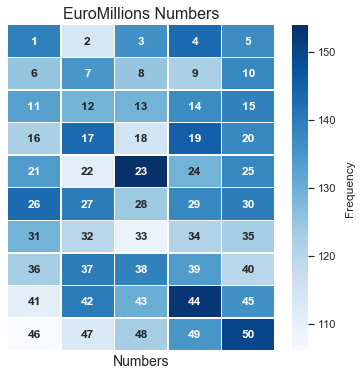

In [7]:
fig, ax = plt.subplots(figsize=(6,6)) 
sns.heatmap(
    data=numbers_count.reshape((10,5)), 
    annot=numbers.reshape((10, 5)), 
    linewidths=.5, 
    cmap='Blues', 
    ax=ax, 
    xticklabels=False, 
    yticklabels=False, 
    annot_kws={'fontsize':12, 'fontweight': 'bold'},
    vmin = np.min(numbers_count),
    vmax = np.max(numbers_count)
)
ax.set_title('EuroMillions Numbers', fontsize=16)
ax.set_xlabel('Numbers', fontsize=14)
ax.set_ylabel('Frequency', fontsize=12)
ax.yaxis.set_label_coords(1.3, 0.5)
plt.show()

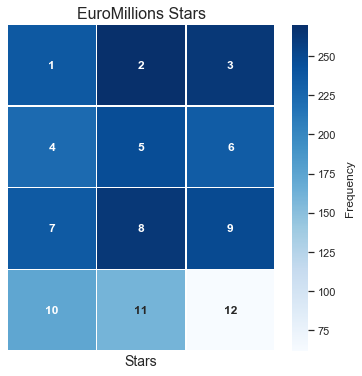

In [8]:
fig, ax = plt.subplots(figsize=(6,6)) 
sns.heatmap(
    data=stars_count.reshape((4,3)), 
    annot=stars.reshape((4, 3)), 
    linewidths=.5, 
    cmap='Blues', 
    ax=ax, 
    xticklabels=False, 
    yticklabels=False, 
    annot_kws={'fontsize':12, 'fontweight': 'bold'},
    vmin = np.min(stars_count),
    vmax = np.max(stars_count)
)
ax.set_title('EuroMillions Stars', fontsize=16)
ax.set_xlabel('Stars', fontsize=14)
ax.set_ylabel('Frequency', fontsize=12)
ax.yaxis.set_label_coords(1.3, 0.5)
plt.show()

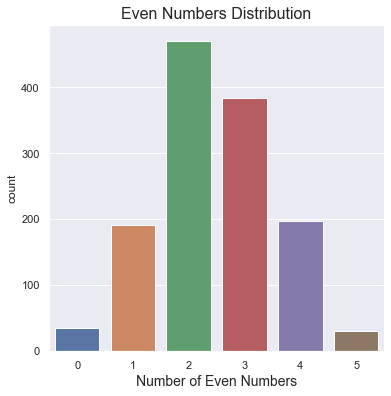

In [9]:
fig, ax = plt.subplots(figsize=(6,6)) 
sns.countplot(
    x=data['even_numbers'],
    ax=ax,
)
ax.set_title("Even Numbers Distribution", fontsize=16)
ax.set_xlabel("Number of Even Numbers", fontsize=14)
plt.show()

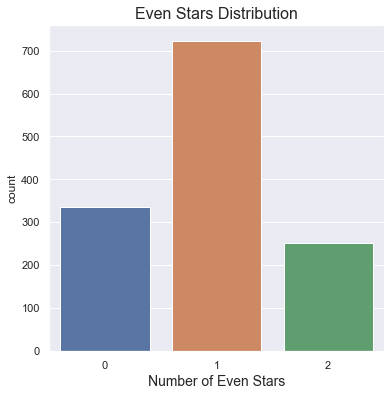

In [10]:
fig, ax = plt.subplots(figsize=(6,6)) 
sns.countplot(
    x=data['even_stars'],
    ax=ax,
)
ax.set_title("Even Stars Distribution", fontsize=16)
ax.set_xlabel("Number of Even Stars", fontsize=14)
plt.show()